In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
X_test.shape

(10000, 28, 28)

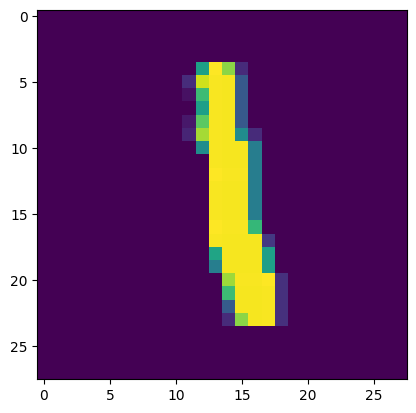

In [6]:
import matplotlib.pyplot as plt
plt.imshow(X_train[6])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,450 (474.41 KB)

 Trainable params: 121,450 (474.41 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs = 10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9983 - loss: 0.0056 - val_accuracy: 0.9764 - val_loss: 0.2077
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9986 - loss: 0.0041 - val_accuracy: 0.9774 - val_loss: 0.2032
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.9769 - val_loss: 0.2207
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9977 - loss: 0.0080 - val_accuracy: 0.9785 - val_loss: 0.2023
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9749 - val_loss: 0.2178
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.9740 - val_loss: 0.2257
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9977 - loss: 0.0113 - val_accuracy: 0.9749 - val_loss: 0.2008
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9995 - loss: 0.0018 -

In [17]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [19]:
y_prob[0]

array([2.2070659e-30, 6.0627013e-13, 3.2307904e-20, 1.6205480e-24,
       1.3657978e-19, 3.9455910e-26, 1.0782141e-22, 9.9999994e-01,
       6.6773319e-25, 5.0114156e-20], dtype=float32)

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_score = accuracy_score(y_test, y_pred)

In [24]:
accuracy_score

0.9789

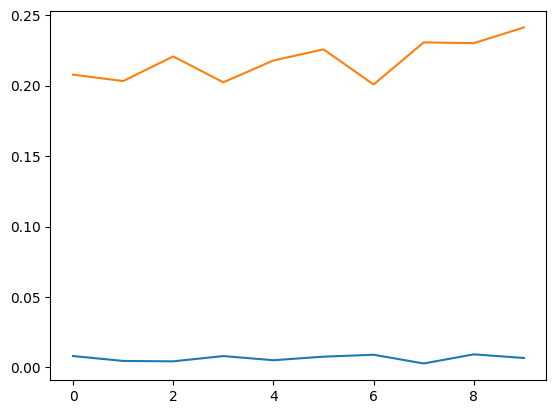

In [25]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

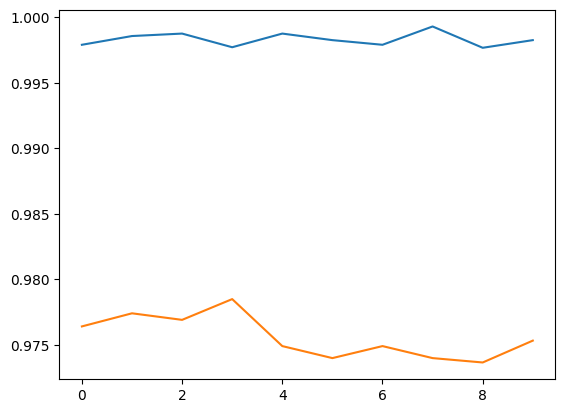

In [26]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])